<a href="https://colab.research.google.com/github/sitbayevalibek/Portfolio-Projects/blob/main/TASHKENT_HOME_PREDICT_portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning

### Portfolio uchun vazifa: Toshkent shahrida uylarning narxini aniqlash.

Ushbu amaliyotda sizning vazifangiz berilgan ma`lumotlar asosida Toshkent shahridagi uylarning narxini aniqlash.

# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy joylashgan qavat
- `max_levels` - ja'mi qavatlar soni
- `price` - uy narxi

## Vazifani CRSIP-DM Metolodgiyasi yordamida bajaring.
<img src="https://i.imgur.com/dzZnnYi.png" alt="CRISP-DM" width="800"/>

## Kutubxonalarni chaqirish

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


In [ ]:
df['price'].unique()

array(['52000', '56000', '37000', '49500', '55000', '25500', '21200',
       '20000', '26200', '22200', '24200', '30200', '22500', '32500',
       '45000', '47000', '49900', '76000', '65000', '47500', '30000',
       '32000', '44000', '56500', '35000', '23500', '60500', '68000',
       '41500', '52500', '43000', '80000', '42000', '23000', '88784',
       '97000', '28500', '34500', '51000', '48000', '40000', '67000',
       '40500', '54000', '36000', '63000', '63500', '70000', '91000',
       '83000', '19765', '50000', '86000', '31500', '26500', '14500',
       '27000', '59500', '47299', '38000', '29500', '61500', '46500',
       '58400', '26000', '105000', '53500', '12500', '107000', '39414',
       '60000', '49000', '18000', '42500', '45800', '24000', '58000',
       '55500', '31000', '41000', '50500', '13071', '45188', '53000',
       '25600', '35226', '36500', '142000', '85000', '110000', '69000',
       '28900', '34000', '25000', '39000', '125000', '28000', '43500',
       '39999',

In [ ]:
df['size'].unique()

array(['57', '52', '42', '65', '70', '28', '30', '32', '51', '67', '35',
       '43', '90', '80', '69', '96', '76', '45', '27', '64', '26', '72',
       '100', '63', '48', '102', '78', '34', '56', '98', '93', '60', '82',
       '120', '110', '95', '68', '46', '40', '53', '54', '20', '50', '36',
       '58', '74', '94', '85', '125', '64.67', '22', '66', '37', '61',
       '69.65', '88', '38', '55.13', '91', '111', '107', '62', '40.41',
       '75', '84', '117', '47', '33', '187', '29', '11', '122', '119',
       '164', '92', '55', '89', '208', '44', '86', '150', '56.10', '83',
       '49', '142', '115', '350', '81', '89.55', '59', '145', '116', '77',
       '24', '41', '255', '266', '210', '55.62', '140', '141', '60.94',
       '165', '215', '66.82', '128', '97', '130', '105', '137', '47.14',
       '71', '160', '118', '152', '21', '104', '180', '109', '135', '73',
       '39', '39.11', '157', '112', '93.22', '106', '214', '235', '16',
       '300', '57.95', '79', '5', '53.06', '62.50',

**'size' va 'price' ustunlaridagi matnlarni NaN qiymatlariga almashtirish**

In [ ]:
df['price'] = df['price'].replace({'Договорная': np.nan}).astype('float')
df['size'] = df['size'].replace({'Площадьземли:1сот': np.nan}).astype('float')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7565 non-null   object 
 1   district    7565 non-null   object 
 2   rooms       7565 non-null   int64  
 3   size        7564 non-null   float64
 4   level       7565 non-null   int64  
 5   max_levels  7565 non-null   int64  
 6   price       7466 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 413.8+ KB


In [ ]:
df.describe()

,rooms,size,level,max_levels,price
count,7565.000000,7564.000000,7565.000000,7565.000000,7.466000e+03
mean,2.625644,113.268990,3.699273,6.038202,7.133421e+04
std,1.085201,1491.312092,2.237275,2.613271,6.405237e+05
min,1.000000,1.000000,1.000000,1.000000,2.000000e+00
25%,2.000000,50.000000,2.000000,4.000000,3.500000e+04
50%,3.000000,66.000000,3.000000,5.000000,4.650000e+04
75%,3.000000,86.000000,5.000000,9.000000,6.700000e+04
max,10.000000,70000.000000,19.000000,25.000000,5.200000e+07


In [ ]:
df.isna().sum()

location       0
district       0
rooms          0
size           1
level          0
max_levels     0
price         99
dtype: int64

Bu funksiya 'size' ustunidagi NaN qiymatlarni xonalar soniga moslab o'rtacha qiymatini qo'yadi.

In [ ]:
def fill_size_by_num_rooms(df):
    nan_rows = df[pd.isna(df['size'])].index
    mean_size = df.groupby('rooms')['size'].mean()
    for row in nan_rows:
        num_rooms = df.at[row, 'rooms']
        df.at[row, 'size'] = mean_size.get(num_rooms)

In [ ]:
fill_size_by_num_rooms(df)

'size' ustunida noodatiy qiymatlar bor ekan. Ularni filtrlash kerak.

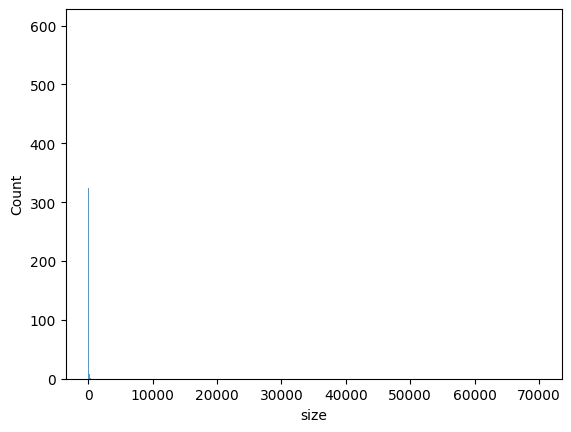

In [ ]:
sns.histplot(data=df, x='size')
plt.show()

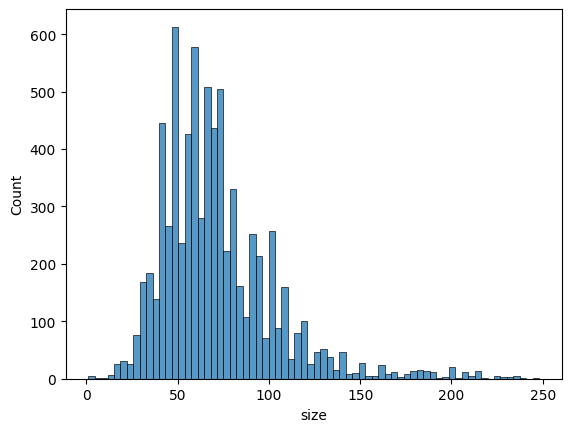

In [ ]:
df = df[df['size']<250] #filtr
sns.histplot(data=df, x='size')
plt.show()

'price' ustunida noodatiy qiymatlar bor ekan. Ularni filtrlash kerak.

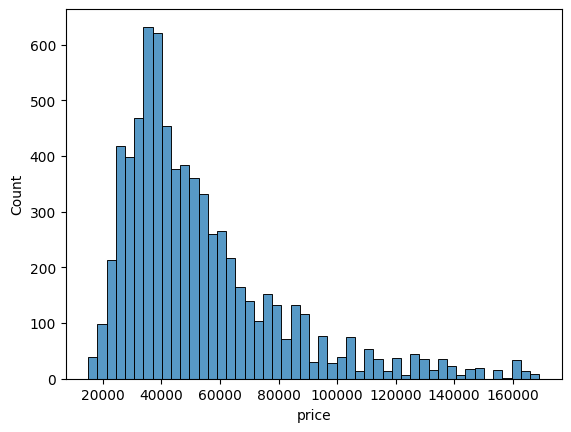

In [ ]:
df = df[df['price']<170000] #filtr
sns.histplot(data=df, x='price')
plt.show()

In [ ]:
def price_mean_kam_rooms(df):
    filtered_rows = df[df['price'] < 15000]
    mean_price = df.groupby('rooms')['price'].mean()
    for index, row in filtered_rows.iterrows():
        num_rooms = row['rooms']
        df.at[index, 'price'] = mean_price.get(num_rooms)

In [ ]:
price_mean_kam_rooms(df)

In [ ]:
def fill_price_by_num_rooms(df):
    nan_rows = df[pd.isna(df['price'])].index
    orta_prices = df.groupby('rooms')['price'].mean()
    for row in nan_rows:
        num_rooms = df.at[row, 'rooms']
        df.at[row, 'price'] = orta_prices.get(num_rooms)

In [ ]:
fill_price_by_num_rooms(df)

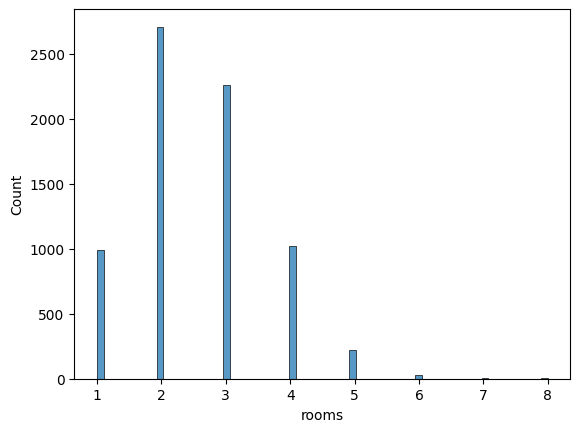

In [ ]:
sns.histplot(data=df, x='rooms')
plt.show()

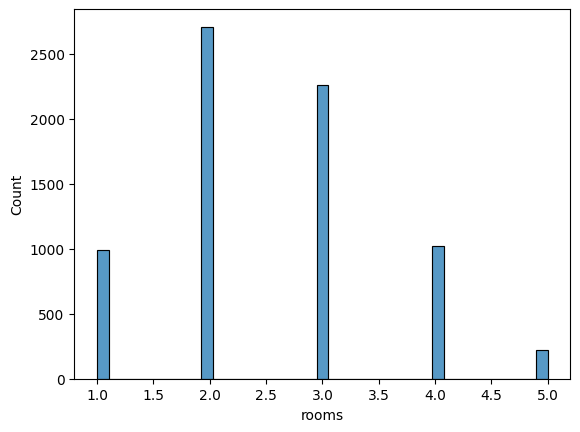

In [ ]:
df=df[df['rooms']<6]
sns.histplot(data=df, x='rooms')
plt.show()

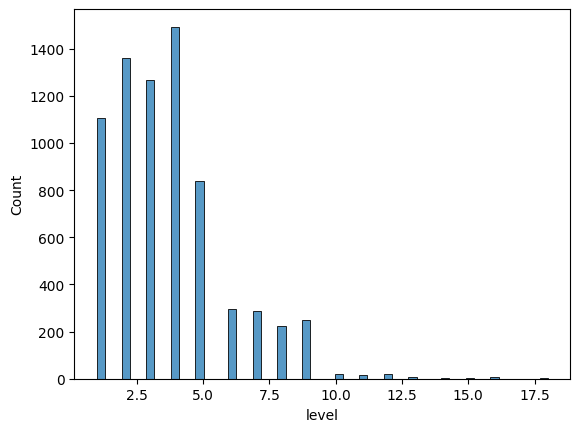

In [ ]:
sns.histplot(data=df, x='level')
plt.show()

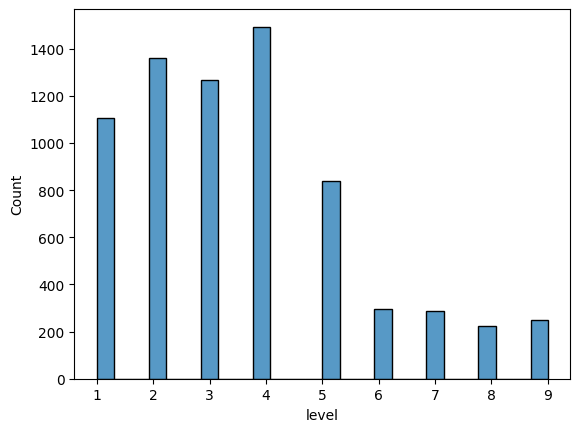

In [ ]:
df = df[df['level']<10]
sns.histplot(data=df, x='level')
plt.show()

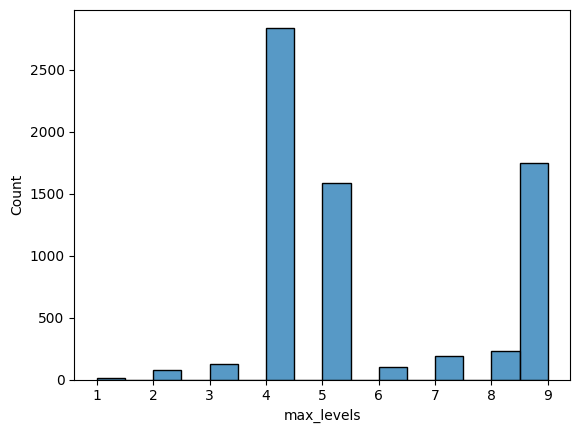

In [ ]:
df = df[df['max_levels']<10]
sns.histplot(data=df, x='max_levels')
plt.show()

In [ ]:
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57.0,4,4,52000.0
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52.0,4,5,56000.0
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42.0,4,4,37000.0
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65.0,1,4,49500.0
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70.0,3,5,55000.0


Bizga 'location' ustuni kerak emas.

In [ ]:
df = df.drop('location', axis=1)

In [ ]:
df.head()

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0


Dataset'ni train va test set'larga ajratish.

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

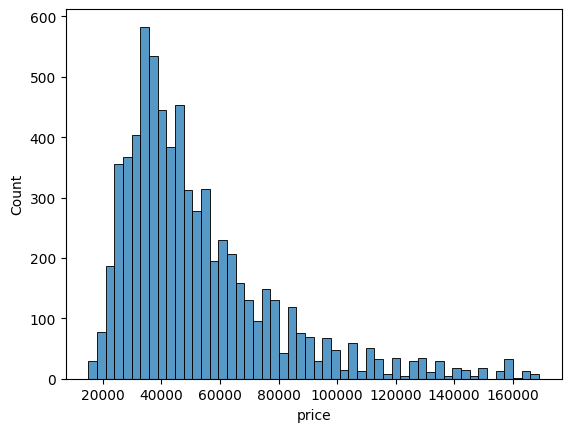

In [ ]:
sns.histplot(data=df, x='price')
plt.show()

In [ ]:
train_set

,district,rooms,size,level,max_levels,price
26,Учтепинский,3,96.0,3,4,65000.0
3818,Мирабадский,2,97.0,6,8,155000.0
66,Чиланзарский,4,95.0,2,4,83000.0
1130,Мирзо-Улугбекский,1,35.0,3,5,25500.0
2822,Мирабадский,3,85.0,3,9,82999.0
...,...,...,...,...,...,...
4143,Шайхантахурский,2,65.0,2,4,56500.0
5678,Яшнободский,3,90.0,4,7,90000.0
5721,Шайхантахурский,3,70.0,4,4,45000.0
5907,Юнусабадский,4,138.0,2,4,84000.0


In [ ]:
train_set

,district,rooms,size,level,max_levels,price
26,Учтепинский,3,96.0,3,4,65000.0
3818,Мирабадский,2,97.0,6,8,155000.0
66,Чиланзарский,4,95.0,2,4,83000.0
1130,Мирзо-Улугбекский,1,35.0,3,5,25500.0
2822,Мирабадский,3,85.0,3,9,82999.0
...,...,...,...,...,...,...
4143,Шайхантахурский,2,65.0,2,4,56500.0
5678,Яшнободский,3,90.0,4,7,90000.0
5721,Шайхантахурский,3,70.0,4,4,45000.0
5907,Юнусабадский,4,138.0,2,4,84000.0


In [ ]:
X_train = train_set.drop("price", axis=1)
y = train_set["price"].copy()

X_num = X_train.drop("district", axis=1)

## Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_pipeline = Pipeline([
          ('std_scaler', StandardScaler())             
])

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(X_num)
cat_attribs = ['district']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

In [ ]:
X_prepared = full_pipeline.fit_transform(X_train)

# Modelling

In [ ]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()

O'qitish

In [ ]:
LR_model.fit(X_prepared, y)

LinearRegression()

In [ ]:
# tasodifiy 5 ta qatorni ajratib olamiz
test_data = X_train.sample(5)
test_data

,district,rooms,size,level,max_levels
4131,Чиланзарский,2,50.0,3,5
4897,Шайхантахурский,4,99.3,4,9
2755,Юнусабадский,2,50.0,4,4
7501,Учтепинский,1,35.0,4,5
3477,Чиланзарский,2,54.0,1,4


In [ ]:
# yuqoridagi qatorlarga mos keluvchi narxlarni ajratib olamiz (biz aynan shu qiymatlarni bashorat qilishimiz kerak)
test_label = y.loc[test_data.index]
test_label

4131    35500.0
4897    77500.0
2755    46500.0
7501    27000.0
3477    35500.0
Name: price, dtype: float64

In [ ]:
test_data_prepared = full_pipeline.transform(test_data)
test_data_prepared

array([[-0.54782885, -0.6828089 , -0.26772947, -0.32394635,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.46591069,  1.14927629,  0.23264705,  1.53620316,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.54782885, -0.6828089 ,  0.23264705, -0.78898373,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [-1.55469862, -1.24023847,  0.23264705, -0.32394635,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.54782885, -0.53416101, -1

Bashorat (predict) qilamiz:

In [ ]:
predicted_data = LR_model.predict(test_data_prepared)
predicted_data

array([37171.74298005, 79963.66527439, 37541.60626042, 21470.35208654,
       42989.51503233])

In [ ]:
pd.DataFrame({'Prognoz':predicted_data, 'Real baxosi': test_label})

,Prognoz,Real baxosi
4131,37171.742980,35500.0
4897,79963.665274,77500.0
2755,37541.606260,46500.0
7501,21470.352087,27000.0
3477,42989.515032,35500.0


## Modelni Baholaymiz

In [ ]:
X_test = test_set.drop('price', axis=1)
X_test

,district,rooms,size,level,max_levels
580,Учтепинский,4,80.0,5,5
1982,Мирзо-Улугбекский,1,35.0,4,4
2627,Юнусабадский,4,92.0,2,5
3733,Шайхантахурский,4,139.0,6,7
6288,Учтепинский,2,50.0,4,4
...,...,...,...,...,...
2652,Яшнободский,1,20.0,2,4
1631,Яккасарайский,3,75.0,2,4
5636,Мирзо-Улугбекский,4,80.0,4,4
3134,Юнусабадский,4,90.0,2,4


In [ ]:
y_test = test_set['price'].copy()
y_test

580      62000.000000
1982     29000.000000
2627     68000.000000
3733    150000.000000
6288     37000.000000
            ...      
2652     28202.766431
1631     55000.000000
5636     27500.000000
3134     48500.000000
2691     31000.000000
Name: price, Length: 1384, dtype: float64

In [ ]:
X_test_prepared = full_pipeline.transform(X_test)

In [ ]:
y_predicted = LR_model.predict(X_test_prepared)

In [ ]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

15526.82615871222


## DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
Tree_model = DecisionTreeRegressor()
Tree_model.fit(X_prepared, y)

DecisionTreeRegressor()

In [ ]:
y_predicted = Tree_model.predict(X_test_prepared)

In [ ]:
lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

17249.208778212444


## RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()
RF_model.fit(X_prepared, y)

RandomForestRegressor()

In [ ]:
y_predicted = RF_model.predict(X_test_prepared)
lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

13032.96016447915


## Cross-Validation usuli bilan baholash

In [ ]:
X = df.drop("price", axis=1)
y = df["price"].copy()

X_prepared = full_pipeline.transform(X)

In [ ]:
!pip install catboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 2.3 MB/s eta 0:00:00


In [ ]:
seed = 42

# MODELS
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge

models = [
    LinearRegression(),
    KNeighborsRegressor(n_neighbors=3),
    DecisionTreeRegressor(random_state=seed),
#    SGDRegressor(random_state=seed), 
    AdaBoostRegressor(random_state=seed),
    GradientBoostingRegressor(random_state=seed),
 #   XGBRegressor(),
    ExtraTreesRegressor(random_state=seed),
    RandomForestRegressor(random_state=seed),
    BaggingRegressor(random_state=seed),
 #   LGBMRegressor(random_state=seed),
    CatBoostRegressor(verbose=False),
    Ridge(alpha=1.0),
    Lasso(alpha=1.0),
    SVR(kernel='rbf', C=1.0, epsilon=0.1),
    KNeighborsRegressor(n_neighbors=5),
    BayesianRidge()
    
]

models_name = [
    LinearRegression().__class__.__name__,
    KNeighborsRegressor().__class__.__name__,
    DecisionTreeRegressor(random_state=seed).__class__.__name__,
 #   SGDRegressor(random_state=seed).__class__.__name__, 
    AdaBoostRegressor(random_state=seed).__class__.__name__,
    GradientBoostingRegressor(random_state=seed).__class__.__name__,
#    XGBRegressor().__class__.__name__,
    ExtraTreesRegressor(random_state=seed).__class__.__name__,
    RandomForestRegressor(random_state=seed).__class__.__name__,
    BaggingRegressor(random_state=seed).__class__.__name__,
#    LGBMRegressor(random_state=seed).__class__.__name__,
    CatBoostRegressor(verbose=False).__class__.__name__,
    Ridge(alpha=0.75).__class__.__name__,
    Lasso(alpha=0.75).__class__.__name__,
    SVR(kernel='rbf', C=1.0, epsilon=0.2).__class__.__name__,
    KNeighborsRegressor(n_neighbors=7).__class__.__name__,
    BayesianRidge().__class__.__name__
]
models_name = [
    LinearRegression().__class__.__name__,
    KNeighborsRegressor().__class__.__name__,
    DecisionTreeRegressor(random_state=seed).__class__.__name__,
 #   SGDRegressor(random_state=seed).__class__.__name__, 
    AdaBoostRegressor(random_state=seed).__class__.__name__,
    GradientBoostingRegressor(random_state=seed).__class__.__name__,
#    XGBRegressor().__class__.__name__,
    ExtraTreesRegressor(random_state=seed).__class__.__name__,
    RandomForestRegressor(random_state=seed).__class__.__name__,
    BaggingRegressor(random_state=seed).__class__.__name__,
#    LGBMRegressor(random_state=seed).__class__.__name__,
    CatBoostRegressor(verbose=False).__class__.__name__,
    Ridge(alpha=0.75).__class__.__name__,
    Lasso(alpha=0.75).__class__.__name__,
    SVR(kernel='rbf', C=1.0, epsilon=0.2).__class__.__name__,
    KNeighborsRegressor(n_neighbors=7).__class__.__name__,
    BayesianRidge().__class__.__name__
]

In [ ]:
from sklearn.model_selection import cross_val_score


rayting=[]
std = []

for i in models: 
    try: 
        rayting.append(np.mean(cross_val_score(estimator=i,X=X_prepared,y= y, cv=5, scoring='neg_root_mean_squared_error'))) 
        std.append(np.std(cross_val_score(estimator=i,X=X_prepared,y= y, cv=5, scoring='neg_root_mean_squared_error')))        
        print(i,': DONE') 
    except: 
        rayting.append('Error Occured')
        print(i,': ERROR')

LinearRegression() : DONE
KNeighborsRegressor(n_neighbors=3) : DONE
DecisionTreeRegressor(random_state=42) : DONE
AdaBoostRegressor(random_state=42) : DONE
GradientBoostingRegressor(random_state=42) : DONE
ExtraTreesRegressor(random_state=42) : DONE
RandomForestRegressor(random_state=42) : DONE
BaggingRegressor(random_state=42) : DONE
<catboost.core.CatBoostRegressor object at 0x7f617c357070> : DONE
Ridge() : DONE
Lasso() : DONE
SVR() : DONE
KNeighborsRegressor() : DONE
BayesianRidge() : DONE


## Bu yerda turli xil modellarning natijalari keltirilgan. Modelimiz Toshkent shahridagi uylarni quyidagicha xatolikda bashorat qilyapti.

In [ ]:
table = pd.DataFrame(models_name)
table.columns = ['Models']
table['Result'] = (rayting)
table['Dev'] = std
table.sort_values(by="Result")

,Models,Result,Dev
11,SVR,-27708.123494,2338.336311
3,AdaBoostRegressor,-17179.930893,1171.383886
2,DecisionTreeRegressor,-17117.372985,1522.183791
0,LinearRegression,-15655.072415,1471.275702
10,Lasso,-15654.453087,1471.398517
9,Ridge,-15654.430855,1471.243376
13,BayesianRidge,-15654.001858,1471.914678
1,KNeighborsRegressor,-14942.714614,1595.807521
12,KNeighborsRegressor,-14729.503794,1692.415814
4,GradientBoostingRegressor,-14255.250968,1428.101150
